In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_dir = '../data'

In [3]:
os.listdir(data_dir)

['DR_Demo_Pred_Main_Reg.csv',
 'DR_Demo_Lending_Club.csv',
 'DR_Demo_Fire_Ins_Loss_only.csv']

In [4]:
fire_ins_file_name = 'DR_Demo_Fire_Ins_Loss_only.csv'
fire_ins_dataset_path = os.path.join(data_dir, fire_ins_file_name)

# pred_main_file_name = 'DR_Demo_Pred_Main_Reg.csv'
# pred_main_dataset_path = os.path.join(data_dir, pred_main_file_name)

# lending_club_file_name = 'DR_Demo_Lending_Club.csv'
# lending_club_dataset_path = os.path.join(data_dir, lending_club_file_name)

In [52]:
# load the dataset
fire_ins_df = pd.read_csv(fire_ins_dataset_path)
# or
# url = 'https://s3.amazonaws.com/datarobot_public_datasets/DR_Demo_Fire_Ins_Loss_only.csv'
# fire_ins_df = pd.read_csv(url)

## Exploratory data analysis part

In [6]:
fire_ins_df.head(1)

,loss,Exposure,Rating_Class,Sub_Rating_Class,Renewal_class,Sub_Renewal_Class,Property_size,Residents,Commercial,Norm_fire_risk,...,crime_arson,crime_burglary,crime_neighbour_watch,crime_community,crime_risk,Geographical_risk,Weather_risk,ISO,ISO_cat,ISO_desc
0,0.07,3.0,H1,NaN,NaN,NaN,3.0,4.0,NaN,4.314082,...,0.939346,1.708534,0.808015,1.040819,1.171366,0.284447,0.313157,5,ISO 5 - Modified or Semi Fire Resistive (MFR o...,which and floors. greater roof _—– modified an...


In [7]:
fire_ins_df.shape

(1217, 31)

Descriptive statistics:

In [8]:
pd.concat([
    fire_ins_df.describe(include='all').T, 
    fire_ins_df.dtypes.rename('infered_dtype')
], axis=1)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,infered_dtype
loss,1217,NaN,NaN,NaN,0.0804766,0.0504252,0.01,0.04,0.07,0.1,0.2,float64
Exposure,210,NaN,NaN,NaN,2.80952,0.726731,1,2,3,3,5,float64
Rating_Class,1130,38,H1,224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object
Sub_Rating_Class,5,3,D,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object
Renewal_class,124,6,B,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object
Sub_Renewal_Class,103,3,B,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object
Property_size,1216,NaN,NaN,NaN,3.82072,1.59859,1,3,3.5,5,8,float64
Residents,1212,NaN,NaN,NaN,2.51403,1.31897,1,1,2,4,6,float64
Commercial,998,2,A,854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object
Norm_fire_risk,1217,NaN,NaN,NaN,4.04076,0.232445,3.77648,3.89895,3.89895,4.17121,5.12335,float64


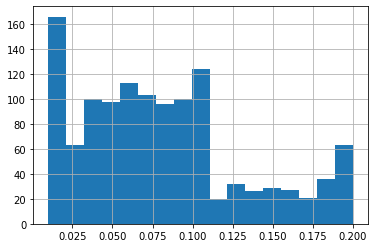

In [9]:
# distribution of loss values
fire_ins_df.loss.hist(bins='auto')

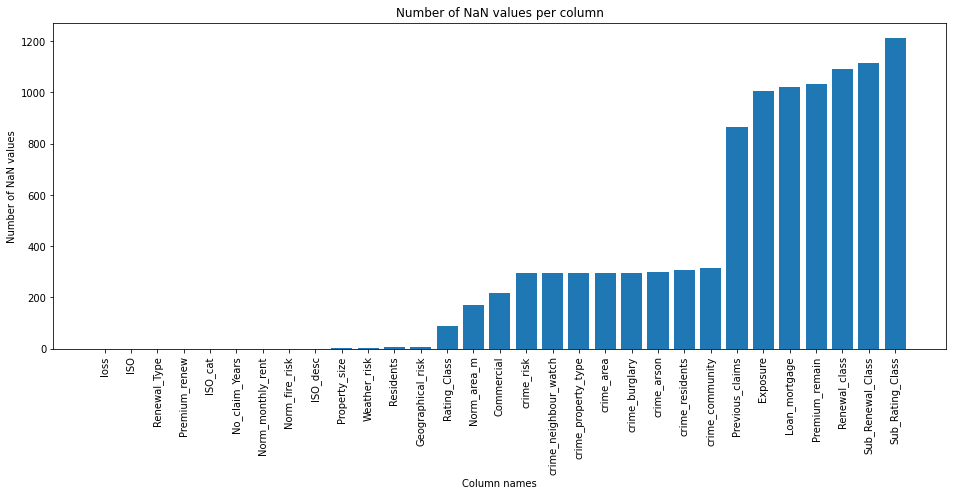

In [10]:
nans_per_column = fire_ins_df.isna().sum(axis=0)
sorted_indices = np.argsort(nans_per_column)

plt.figure(figsize=(16, 6))
plt.title('Number of NaN values per column')
plt.bar(fire_ins_df.columns[sorted_indices], nans_per_column[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Column names')
plt.ylabel('Number of NaN values')
plt.show()

In [11]:
for column_name in fire_ins_df.columns:
    
    column = fire_ins_df[column_name]
    unique_values = column.unique()
    
    print(
        f'Column name: "{column_name}"\n'
        f'Number of unique values: {unique_values.shape[0]}\n'
        f'Number of NaN values: {column.isna().sum()}\n'
        f'Unique values:\n {unique_values}\n'
    )

Column name: "loss"
Number of unique values: 20
Number of NaN values: 0
Unique values:
 [0.07 0.13 0.02 0.04 0.01 0.12 0.08 0.11 0.06 0.1  0.15 0.14 0.03 0.09
 0.18 0.2  0.05 0.16 0.19 0.17]

Column name: "Exposure"
Number of unique values: 6
Number of NaN values: 1007
Unique values:
 [ 3. nan  4.  2.  1.  5.]

Column name: "Rating_Class"
Number of unique values: 39
Number of NaN values: 87
Unique values:
 ['H1' 'M1' 'D4' 'D3' 'R7' 'G1' 'J1' 'R8' 'C1' 'G2' 'P1' 'R3' 'S1' 'J6'
 'H3' 'E2' 'J2' 'R5' 'I1' 'L1' 'J4' 'J5' 'E1' 'O2' 'O1' 'E3' 'F1' 'J3'
 'E4' 'D1' 'R6' 'N1' nan 'B1' 'K1' 'A1' 'H2' 'E5' 'R1']

Column name: "Sub_Rating_Class"
Number of unique values: 4
Number of NaN values: 1212
Unique values:
 [nan 'H' 'D' 'O']

Column name: "Renewal_class"
Number of unique values: 7
Number of NaN values: 1093
Unique values:
 [nan 'B' 'D' 'F' 'C' 'A' 'E']

Column name: "Sub_Renewal_Class"
Number of unique values: 4
Number of NaN values: 1114
Unique values:
 [nan 'B' 'A' 'C']

Column name: "Prop

**Note**: 

From the output above that there are a lot of columns with large number of `NaN` values.<br>
We may also make sure that the categorical/text columns don't contain whitespaces and empty strings as values.<br>
The `ISO` and `ISO_cat` columns store the same imformation:

In [12]:
for _, (iso, iso_cat) in fire_ins_df[['ISO', 'ISO_cat']].iterrows():
    print(iso, iso_cat)
    assert str(iso) == iso_cat[4], 'Values in "ISO" and "ISO_cat" columns are not the same!'

5 ISO 5 - Modified or Semi Fire Resistive (MFR or SFR)
6 ISO 6 - Fire Resistive (FR)
1 ISO 1 Frame (combustible walls or roof)
1 ISO 1 Frame (combustible walls or roof)
6 ISO 6 - Fire Resistive (FR)
1 ISO 1 Frame (combustible walls or roof)
1 ISO 1 Frame (combustible walls or roof)
3 ISO 3 - Non Combustible (NC)
6 ISO 6 - Fire Resistive (FR)
5 ISO 5 - Modified or Semi Fire Resistive (MFR or SFR)
2 ISO 2 Joisted Masonry (JM) (noncombustible)
5 ISO 5 - Modified or Semi Fire Resistive (MFR or SFR)
4 ISO 4 - Masonry Non Combustible (MNC)
5 ISO 5 - Modified or Semi Fire Resistive (MFR or SFR)
2 ISO 2 Joisted Masonry (JM) (noncombustible)
4 ISO 4 - Masonry Non Combustible (MNC)
1 ISO 1 Frame (combustible walls or roof)
3 ISO 3 - Non Combustible (NC)
4 ISO 4 - Masonry Non Combustible (MNC)
2 ISO 2 Joisted Masonry (JM) (noncombustible)
1 ISO 1 Frame (combustible walls or roof)
2 ISO 2 Joisted Masonry (JM) (noncombustible)
1 ISO 1 Frame (combustible walls or roof)
1 ISO 1 Frame (combustible wal

3 ISO 3 - Non Combustible (NC)
1 ISO 1 Frame (combustible walls or roof)
4 ISO 4 - Masonry Non Combustible (MNC)
4 ISO 4 - Masonry Non Combustible (MNC)
5 ISO 5 - Modified or Semi Fire Resistive (MFR or SFR)
2 ISO 2 Joisted Masonry (JM) (noncombustible)
1 ISO 1 Frame (combustible walls or roof)
2 ISO 2 Joisted Masonry (JM) (noncombustible)
3 ISO 3 - Non Combustible (NC)
2 ISO 2 Joisted Masonry (JM) (noncombustible)
5 ISO 5 - Modified or Semi Fire Resistive (MFR or SFR)
3 ISO 3 - Non Combustible (NC)
3 ISO 3 - Non Combustible (NC)
3 ISO 3 - Non Combustible (NC)
1 ISO 1 Frame (combustible walls or roof)
6 ISO 6 - Fire Resistive (FR)
6 ISO 6 - Fire Resistive (FR)
5 ISO 5 - Modified or Semi Fire Resistive (MFR or SFR)
2 ISO 2 Joisted Masonry (JM) (noncombustible)
5 ISO 5 - Modified or Semi Fire Resistive (MFR or SFR)
4 ISO 4 - Masonry Non Combustible (MNC)
1 ISO 1 Frame (combustible walls or roof)
6 ISO 6 - Fire Resistive (FR)
3 ISO 3 - Non Combustible (NC)
1 ISO 1 Frame (combustible walls

## AutoML part

In [33]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit, ShuffleSplit, KFold
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.base import BaseEstimator, TransformerMixin

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [14]:
target_col = 'loss'

Y = fire_ins_df.pop(target_col)
X = fire_ins_df

In [45]:
# train test split
RANDOM_STATE = 1

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

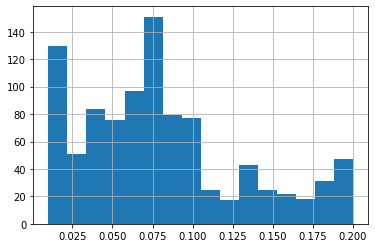

In [46]:
Y_train.hist(bins='auto')

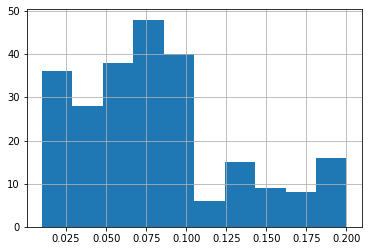

In [47]:
Y_test.hist(bins='auto')

In [22]:
X_test.shape

(244, 30)

**Note:** the distributions of train and test target look similar.

## Baseline Experiment
 
Let's consider model predicting mean value of a `loss` as a baseline. 

In [23]:
baseline_prediction = Y_test.mean()


print(
    f'mean_squared_error: {mean_squared_error(Y_test, np.repeat(baseline_prediction, Y_test.shape[0]))}\n'
    f'r2_score: {r2_score(Y_test, np.repeat(baseline_prediction, Y_test.shape[0]))}'
)

mean_squared_error: 0.002580252284332169
r2_score: 0.0


In [24]:
numeric_dtype = 'Numeric'
categorical_dtype = 'Categorical'
text_dtype = 'Text'

dtypes_map = {
    # 'loss': numeric_dtype,
    'crime_burglary': numeric_dtype,
    'crime_risk': numeric_dtype,
    'ISO_desc': text_dtype,
    'Norm_fire_risk': numeric_dtype,
    'crime_arson': numeric_dtype,
    'ISO': numeric_dtype,
    'Weather_risk': numeric_dtype,
    'Geographical_risk': numeric_dtype,
    'Premium_remain': numeric_dtype,
    'Renewal_Type': categorical_dtype,
    'Commercial': categorical_dtype,
    'crime_property_type': numeric_dtype,
    'Renewal_class': categorical_dtype,
    'crime_neighbour_watch': numeric_dtype,
    'Previous_claims': numeric_dtype,
    'Exposure': numeric_dtype,
    'crime_area': numeric_dtype,
    'ISO_cat': categorical_dtype,
    'Norm_monthly_rent': numeric_dtype,
    'No_claim_Years': numeric_dtype,
    'crime_residents': numeric_dtype,
    'Norm_area_m': numeric_dtype,
    'Rating_Class': categorical_dtype,
    'Property_size': numeric_dtype,
    'Residents': numeric_dtype,
    'crime_community': numeric_dtype,
    'Loan_mortgage': numeric_dtype,
    'Premium_renew': numeric_dtype,
    'Sub_Renewal_Class': categorical_dtype,
    'Sub_Rating_Class': categorical_dtype
}

numeric_features = [coll_name for (coll_name, dtype) in dtypes_map.items() if dtype == numeric_dtype]
categorical_features = [coll_name for (coll_name, dtype) in dtypes_map.items() if dtype == categorical_dtype]
text_features = [coll_name for (coll_name, dtype) in dtypes_map.items() if dtype == text_dtype]

## Experiment 1

In [31]:
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])


preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features),
])

param_grid = { 
    'lr__alpha': Real(0.001, 1, prior='uniform'),
    'lr__l1_ratio': Real(0.001, 1, prior='uniform'),
}

est = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lr', ElasticNet()),
])



bs = BayesSearchCV(est, param_grid, cv=3, scoring='neg_mean_squared_error', 
                   n_iter=35, n_jobs=-1, verbose=10, random_state=RANDOM_STATE)

bs.fit(X_train, Y_train)


print(
    f'best params: {bs.best_params_}\n'
    f'mean_squared_error: {mean_squared_error(Y_test, bs.predict(X_test))}\n'
    f'r2_score: {r2_score(Y_test, bs.predict(X_test))}'
)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0417s.) Setting batch_size=2.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0396s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0298s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0315s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s remai

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0320s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0433s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0288s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0308s.) Settin

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0833s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0690s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0455s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0684s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0978s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0728s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0846s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0967s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0484s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0615s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0708s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0629s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1294s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0661s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0697s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0587s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0682s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0734s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0561s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0613s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0638s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0557s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0479s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0408s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0822s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


best params: OrderedDict([('lr__alpha', 0.001), ('lr__l1_ratio', 0.0010000000000000018)])
mean_squared_error: 0.0024151722845530024
r2_score: 0.06397823995024321


/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## Experiment 2

In [39]:
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures(2))
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])


preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features),
])

param_grid = { 
    'lr__alpha': Real(0.001, 1, prior='uniform'),
    'lr__l1_ratio': Real(0.001, 1, prior='uniform'),
}

est = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lr', ElasticNet()),
])



bs = BayesSearchCV(est, param_grid, cv=3, scoring='neg_mean_squared_error', 
                   n_iter=35, n_jobs=-1, verbose=10, random_state=RANDOM_STATE)

bs.fit(X_train, Y_train)


print(
    f'best params: {bs.best_params_}\n'
    f'mean_squared_error: {mean_squared_error(Y_test, bs.predict(X_test))}\n'
    f'r2_score: {r2_score(Y_test, bs.predict(X_test))}'
)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0627s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0489s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0533s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent 

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0594s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0394s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0428s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1047s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1021s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1135s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0694s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0710s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0666s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0830s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.4s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1012s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0847s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0750s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0752s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0762s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1517s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.8s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0871s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.8s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0657s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0653s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0673s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0594s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0625s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0547s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


best params: OrderedDict([('lr__alpha', 0.006941493045052765), ('lr__l1_ratio', 0.0047842789618261815)])
mean_squared_error: 0.002254348509306613
r2_score: 0.12630694176864476


## Experiment 3

In [49]:
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
#     ('poly', PolynomialFeatures(2))
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])


preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features),
])

param_grid = { 
    'lr__alpha': Real(0.001, 1, prior='uniform'),
    'lr__l1_ratio': Real(0.001, 1, prior='uniform'),
}

est = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=RANDOM_STATE)),
])

param_grid = {
    'rf__criterion': ['mse'],
    'rf__n_estimators': list(range(1, 10 +1)),
    'rf__max_depth': list(range(2, 15))
}


bs = BayesSearchCV(est, param_grid, 
                  scoring='neg_mean_squared_error', cv=3, refit=True, verbose=10)

bs.fit(X_train, Y_train)


print(
    f'best params: {bs.best_params_}\n'
    f'mean_squared_error: {mean_squared_error(Y_test, bs.predict(X_test))}\n'
    f'r2_score: {r2_score(Y_test, bs.predict(X_test))}'
)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=6 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=6, score=-0.0018736991718233322, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=6 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=6, score=-0.0020310944428935567, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=6 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=6, score=-0.0019223936729064626, total=   0.3s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=13, rf__n_estimators=2 .........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=13, rf__n_estimators=2, score=-0.0025334701166812093, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=13, rf__n_estimators=2 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=13, rf__n_estimators=2, score=-0.002777738584907235, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=13, rf__n_estimators=2 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=13, rf__n_estimators=2, score=-0.002691099171170357, total=   0.3s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=4, rf__n_estimators=2 ..........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=4, rf__n_estimators=2, score=-0.002014787436355535, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=4, rf__n_estimators=2 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=4, rf__n_estimators=2, score=-0.0021443218446431673, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=4, rf__n_estimators=2 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=4, rf__n_estimators=2, score=-0.0023571215731565606, total=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=12, rf__n_estimators=1 .........
[CV]  rf__criterion=mse, rf__max_depth=12, rf__n_estimators=1, score=-0.003192902780203822, total=   0.1s
[CV] rf__criterion=mse, rf__max_depth=12, rf__n_estimators=1 .........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=12, rf__n_estimators=1, score=-0.003459056053451682, total=   0.1s
[CV] rf__criterion=mse, rf__max_depth=12, rf__n_estimators=1 .........
[CV]  rf__criterion=mse, rf__max_depth=12, rf__n_estimators=1, score=-0.003739604690684402, total=   0.1s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=14, rf__n_estimators=7 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=14, rf__n_estimators=7, score=-0.0021766463350464996, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=14, rf__n_estimators=7 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=14, rf__n_estimators=7, score=-0.002307242698814696, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=14, rf__n_estimators=7 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=14, rf__n_estimators=7, score=-0.002179830606254554, total=   0.3s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=14, rf__n_estimators=9 .........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=14, rf__n_estimators=9, score=-0.0021163046533099086, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=14, rf__n_estimators=9 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=14, rf__n_estimators=9, score=-0.0022918913160293736, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=14, rf__n_estimators=9 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=14, rf__n_estimators=9, score=-0.0021388201575142157, total=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=13, rf__n_estimators=4 .........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=13, rf__n_estimators=4, score=-0.0022973808400339637, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=13, rf__n_estimators=4 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=13, rf__n_estimators=4, score=-0.0025557635472916564, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=13, rf__n_estimators=4 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=13, rf__n_estimators=4, score=-0.0024191790760266234, total=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=11, rf__n_estimators=5 .........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=11, rf__n_estimators=5, score=-0.0021750103127690036, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=11, rf__n_estimators=5 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=11, rf__n_estimators=5, score=-0.0024584364633106004, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=11, rf__n_estimators=5 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=11, rf__n_estimators=5, score=-0.002291139301318176, total=   0.3s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=13, rf__n_estimators=5 .........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=13, rf__n_estimators=5, score=-0.002275969537468766, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=13, rf__n_estimators=5 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=13, rf__n_estimators=5, score=-0.002460934864315616, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=13, rf__n_estimators=5 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=13, rf__n_estimators=5, score=-0.0023549085059011063, total=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=6, rf__n_estimators=7 ..........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=6, rf__n_estimators=7, score=-0.001946662575094403, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=6, rf__n_estimators=7 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=6, rf__n_estimators=7, score=-0.0021527179022851547, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=6, rf__n_estimators=7 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=6, rf__n_estimators=7, score=-0.001993068547149903, total=   0.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=9, rf__n_estimators=10 .........
[CV]  rf__criterion=mse, rf__max_depth=9, rf__n_estimators=10, score=-0.0020142035580867283, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=9, rf__n_estimators=10 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=9, rf__n_estimators=10, score=-0.002210175632785739, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=9, rf__n_estimators=10 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=9, rf__n_estimators=10, score=-0.0020632821205485343, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend Se

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=7, rf__n_estimators=3 ..........
[CV]  rf__criterion=mse, rf__max_depth=7, rf__n_estimators=3, score=-0.0022947692365039686, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=7, rf__n_estimators=3 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=7, rf__n_estimators=3, score=-0.002351231964813035, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=7, rf__n_estimators=3 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=7, rf__n_estimators=3, score=-0.002539804161008653, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend Se

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=10, rf__n_estimators=8 .........
[CV]  rf__criterion=mse, rf__max_depth=10, rf__n_estimators=8, score=-0.0021016808340930007, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=10, rf__n_estimators=8 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=10, rf__n_estimators=8, score=-0.002194206288644009, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=10, rf__n_estimators=8 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=10, rf__n_estimators=8, score=-0.002148429270905224, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend Se

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=8, rf__n_estimators=6 ..........
[CV]  rf__criterion=mse, rf__max_depth=8, rf__n_estimators=6, score=-0.0021725158910274756, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=8, rf__n_estimators=6 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=8, rf__n_estimators=6, score=-0.0023213023247002683, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=8, rf__n_estimators=6 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=8, rf__n_estimators=6, score=-0.00212349925685044, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=10 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=10, score=-0.001923772501351295, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=10 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=10, score=-0.002033217472239214, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=10 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=10, score=-0.0018886328651628215, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend Se

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=5, rf__n_estimators=9 ..........
[CV]  rf__criterion=mse, rf__max_depth=5, rf__n_estimators=9, score=-0.001942078416412687, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=5, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=5, rf__n_estimators=9, score=-0.002116480538669903, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=5, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=5, rf__n_estimators=9, score=-0.0019658328468960865, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend Se

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=8 ..........
[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=8, score=-0.0018433711616324666, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=8 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=8, score=-0.0020273137500700505, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=8 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=8, score=-0.001907497361147272, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend Se

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=4 ..........
[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=4, score=-0.0019470238712256938, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=4 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=4, score=-0.002024344315711685, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=4 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=4, score=-0.001906254910116962, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=5, rf__n_estimators=3 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=5, rf__n_estimators=3, score=-0.0021508753226635352, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=5, rf__n_estimators=3 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=5, rf__n_estimators=3, score=-0.002210353386524855, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=5, rf__n_estimators=3 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=5, rf__n_estimators=3, score=-0.0022773299969431884, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=6, rf__n_estimators=10 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=6, rf__n_estimators=10, score=-0.0019328938215996108, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=6, rf__n_estimators=10 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=6, rf__n_estimators=10, score=-0.002170665462734321, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=6, rf__n_estimators=10 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=6, rf__n_estimators=10, score=-0.001998094478567415, total=   0.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=9, rf__n_estimators=8 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=9, rf__n_estimators=8, score=-0.002040917965167412, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=9, rf__n_estimators=8 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=9, rf__n_estimators=8, score=-0.00220737887257415, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=9, rf__n_estimators=8 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=9, rf__n_estimators=8, score=-0.002096927171737434, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=10, rf__n_estimators=6 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=10, rf__n_estimators=6, score=-0.0021685881102215514, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=10, rf__n_estimators=6 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=10, rf__n_estimators=6, score=-0.002358157251925374, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=10, rf__n_estimators=6 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=10, rf__n_estimators=6, score=-0.0021411672878693167, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=8, rf__n_estimators=1 ..........
[CV]  rf__criterion=mse, rf__max_depth=8, rf__n_estimators=1, score=-0.003292375566609705, total=   0.1s
[CV] rf__criterion=mse, rf__max_depth=8, rf__n_estimators=1 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=8, rf__n_estimators=1, score=-0.003191834562397687, total=   0.1s
[CV] rf__criterion=mse, rf__max_depth=8, rf__n_estimators=1 ..........
[CV]  rf__criterion=mse, rf__max_depth=8, rf__n_estimators=1, score=-0.003493612874259729, total=   0.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_a

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=4, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=4, rf__n_estimators=9, score=-0.0018877629422099141, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=4, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=4, rf__n_estimators=9, score=-0.002053911692717173, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=4, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=4, rf__n_estimators=9, score=-0.0019557184003645527, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=11, rf__n_estimators=7 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=11, rf__n_estimators=7, score=-0.0021345295345419225, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=11, rf__n_estimators=7 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=11, rf__n_estimators=7, score=-0.0022637163304900843, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=11, rf__n_estimators=7 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=11, rf__n_estimators=7, score=-0.0021869008472340155, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=7, rf__n_estimators=4 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=7, rf__n_estimators=4, score=-0.002258929280485029, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=7, rf__n_estimators=4 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=7, rf__n_estimators=4, score=-0.0023712373736353943, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=7, rf__n_estimators=4 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=7, rf__n_estimators=4, score=-0.002320542103034414, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=12, rf__n_estimators=5 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=12, rf__n_estimators=5, score=-0.0022197980630564457, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=12, rf__n_estimators=5 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=12, rf__n_estimators=5, score=-0.002404475981481305, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=12, rf__n_estimators=5 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=12, rf__n_estimators=5, score=-0.0023047106234596075, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=3 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=3, score=-0.001957877505092057, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=3 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=3, score=-0.0020932520368308377, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=3 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=3, score=-0.002002746241549064, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=2 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=2, score=-0.001965813876929868, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=2 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=2, score=-0.0020353551596531574, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=2 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=2, score=-0.002131597402572191, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=6, rf__n_estimators=1 ..........
[CV]  rf__criterion=mse, rf__max_depth=6, rf__n_estimators=1, score=-0.0028324423636221906, total=   0.1s
[CV] rf__criterion=mse, rf__max_depth=6, rf__n_estimators=1 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=6, rf__n_estimators=1, score=-0.002832217047586178, total=   0.1s
[CV] rf__criterion=mse, rf__max_depth=6, rf__n_estimators=1 ..........
[CV]  rf__criterion=mse, rf__max_depth=6, rf__n_estimators=1, score=-0.0031329161420953445, total=   0.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_a

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=4, rf__n_estimators=10 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=4, rf__n_estimators=10, score=-0.001879390380962691, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=4, rf__n_estimators=10 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=4, rf__n_estimators=10, score=-0.002056105146304664, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=4, rf__n_estimators=10 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=4, rf__n_estimators=10, score=-0.0019567870039253464, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=9, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=9, rf__n_estimators=9, score=-0.00202117546758642, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=9, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=9, rf__n_estimators=9, score=-0.002214141024781427, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=9, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=9, rf__n_estimators=9, score=-0.0020634998549706224, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=5, rf__n_estimators=8 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=5, rf__n_estimators=8, score=-0.0019555216659100047, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=5, rf__n_estimators=8 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=5, rf__n_estimators=8, score=-0.0020840149611153465, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=5, rf__n_estimators=8 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=5, rf__n_estimators=8, score=-0.001988561855025539, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=14, rf__n_estimators=6 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=14, rf__n_estimators=6, score=-0.002177893277609369, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=14, rf__n_estimators=6 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=14, rf__n_estimators=6, score=-0.0024104700791994426, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=14, rf__n_estimators=6 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=14, rf__n_estimators=6, score=-0.0022501179177209455, total=   0.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=10, rf__n_estimators=7 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=10, rf__n_estimators=7, score=-0.0021400959085261296, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=10, rf__n_estimators=7 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=10, rf__n_estimators=7, score=-0.0022294901149471436, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=10, rf__n_estimators=7 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=10, rf__n_estimators=7, score=-0.002145664919373773, total=   0.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=11, rf__n_estimators=3 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=11, rf__n_estimators=3, score=-0.002279643343314024, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=11, rf__n_estimators=3 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=11, rf__n_estimators=3, score=-0.0026782317164316494, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=11, rf__n_estimators=3 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=11, rf__n_estimators=3, score=-0.002618837725332189, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=10 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=10, score=-0.0018428612585241577, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=10 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=10, score=-0.002021033205671014, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=10 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=10, score=-0.0018991400715562734, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=8 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=8, score=-0.0019104705177701588, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=8 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=8, score=-0.0020348342099901005, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=8 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=8, score=-0.001890404821900538, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=7, rf__n_estimators=2 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=7, rf__n_estimators=2, score=-0.00252428308290104, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=7, rf__n_estimators=2 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=7, rf__n_estimators=2, score=-0.002353334776859386, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=7, rf__n_estimators=2 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=7, rf__n_estimators=2, score=-0.00245971466458137, total=   0.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=8, rf__n_estimators=4 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=8, rf__n_estimators=4, score=-0.0023586430913462553, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=8, rf__n_estimators=4 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=8, rf__n_estimators=4, score=-0.0024408460108677277, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=8, rf__n_estimators=4 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=8, rf__n_estimators=4, score=-0.002350654145853393, total=   0.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=12, rf__n_estimators=5 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=12, rf__n_estimators=5, score=-0.0022197980630564457, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=12, rf__n_estimators=5 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=12, rf__n_estimators=5, score=-0.002404475981481305, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=12, rf__n_estimators=5 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=12, rf__n_estimators=5, score=-0.0023047106234596075, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=4, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=4, rf__n_estimators=9, score=-0.0018877629422099141, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=4, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=4, rf__n_estimators=9, score=-0.0020539116927171725, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=4, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=4, rf__n_estimators=9, score=-0.0019557184003645527, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=5, rf__n_estimators=1 ..........
[CV]  rf__criterion=mse, rf__max_depth=5, rf__n_estimators=1, score=-0.0027078902163793655, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=5, rf__n_estimators=1 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=5, rf__n_estimators=1, score=-0.002751046792539266, total=   0.1s
[CV] rf__criterion=mse, rf__max_depth=5, rf__n_estimators=1 ..........
[CV]  rf__criterion=mse, rf__max_depth=5, rf__n_estimators=1, score=-0.002855966469823197, total=   0.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_a

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=9, rf__n_estimators=7 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=9, rf__n_estimators=7, score=-0.002086824860675914, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=9, rf__n_estimators=7 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=9, rf__n_estimators=7, score=-0.0022308256726120347, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=9, rf__n_estimators=7 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=9, rf__n_estimators=7, score=-0.002095797560387101, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=10, rf__n_estimators=4 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=10, rf__n_estimators=4, score=-0.0022690504424367334, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=10, rf__n_estimators=4 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=10, rf__n_estimators=4, score=-0.0025023680176180815, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=10, rf__n_estimators=4 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=10, rf__n_estimators=4, score=-0.002368701270742122, total=   0.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=6, rf__n_estimators=6 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=6, rf__n_estimators=6, score=-0.0019678297652861894, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=6, rf__n_estimators=6 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=6, rf__n_estimators=6, score=-0.002249204801184379, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=6, rf__n_estimators=6 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=6, rf__n_estimators=6, score=-0.0020279223621742027, total=   0.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=9, score=-0.001843860296276293, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=9, score=-0.002042846999206787, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=9, score=-0.0019011457023528336, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=14, rf__n_estimators=3 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=14, rf__n_estimators=3, score=-0.0023921634425536384, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=14, rf__n_estimators=3 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=14, rf__n_estimators=3, score=-0.002686110799599005, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=14, rf__n_estimators=3 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=14, rf__n_estimators=3, score=-0.002648559490370284, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=11, rf__n_estimators=2 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=11, rf__n_estimators=2, score=-0.0024988163067952893, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=11, rf__n_estimators=2 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=11, rf__n_estimators=2, score=-0.002790220340015786, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=11, rf__n_estimators=2 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=11, rf__n_estimators=2, score=-0.0027612675347086953, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=7, rf__n_estimators=5 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=7, rf__n_estimators=5, score=-0.0021582000175136185, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=7, rf__n_estimators=5 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=7, rf__n_estimators=5, score=-0.0023228269754347695, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=7, rf__n_estimators=5 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=7, rf__n_estimators=5, score=-0.002193527079883789, total=   0.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


best params: OrderedDict([('rf__criterion', 'mse'), ('rf__max_depth', 3), ('rf__n_estimators', 10)])
mean_squared_error: 0.0018733607459699968
r2_score: 0.2739621790685218


## Experiment 4

In [50]:
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures(2))
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])


preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features),
])

param_grid = { 
    'lr__alpha': Real(0.001, 1, prior='uniform'),
    'lr__l1_ratio': Real(0.001, 1, prior='uniform'),
}

est = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=RANDOM_STATE)),
])

param_grid = {
    'rf__criterion': ['mse'],
    'rf__n_estimators': list(range(1, 10 +1)),
    'rf__max_depth': list(range(2, 15))
}


bs = BayesSearchCV(est, param_grid, 
                  scoring='neg_mean_squared_error', cv=3, refit=True, verbose=10)

bs.fit(X_train, Y_train)


print(
    f'best params: {bs.best_params_}\n'
    f'mean_squared_error: {mean_squared_error(Y_test, bs.predict(X_test))}\n'
    f'r2_score: {r2_score(Y_test, bs.predict(X_test))}'
)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=8, rf__n_estimators=6 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=8, rf__n_estimators=6, score=-0.002099465105789322, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=8, rf__n_estimators=6 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=8, rf__n_estimators=6, score=-0.0023065001725788357, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=8, rf__n_estimators=6 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=8, rf__n_estimators=6, score=-0.0021736983251178345, total=   0.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=7, rf__n_estimators=7 ..........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=7, rf__n_estimators=7, score=-0.001933457570914174, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=7, rf__n_estimators=7 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=7, rf__n_estimators=7, score=-0.002159901740910291, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=7, rf__n_estimators=7 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=7, rf__n_estimators=7, score=-0.0020948162746027067, total=   0.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=4, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=4, rf__n_estimators=9, score=-0.0018888707209757797, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=4, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=4, rf__n_estimators=9, score=-0.0020310092532765415, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=4, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=4, rf__n_estimators=9, score=-0.0019205790551838668, total=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=5 ..........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=5, score=-0.001914973243737303, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=5 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=5, score=-0.002004236502182522, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=5 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=5, score=-0.0019296072614995788, total=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=7, rf__n_estimators=7 ..........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=7, rf__n_estimators=7, score=-0.001933457570914174, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=7, rf__n_estimators=7 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=7, rf__n_estimators=7, score=-0.002159901740910291, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=7, rf__n_estimators=7 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=7, rf__n_estimators=7, score=-0.0020948162746027067, total=   0.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=4, rf__n_estimators=5 ..........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=4, rf__n_estimators=5, score=-0.001950083875209994, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=4, rf__n_estimators=5 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=4, rf__n_estimators=5, score=-0.0020634635502469667, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=4, rf__n_estimators=5 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=4, rf__n_estimators=5, score=-0.0020126078662443233, total=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=5, rf__n_estimators=3 ..........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=5, rf__n_estimators=3, score=-0.00206170342976318, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=5, rf__n_estimators=3 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=5, rf__n_estimators=3, score=-0.002272824137644387, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=5, rf__n_estimators=3 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=5, rf__n_estimators=3, score=-0.002284652626324875, total=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=12, rf__n_estimators=4 .........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=12, rf__n_estimators=4, score=-0.002263467115108322, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=12, rf__n_estimators=4 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=12, rf__n_estimators=4, score=-0.0024000738784739485, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=12, rf__n_estimators=4 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=12, rf__n_estimators=4, score=-0.002416358190077204, total=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=8, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=8, rf__n_estimators=9, score=-0.0020212820970397435, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=8, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=8, rf__n_estimators=9, score=-0.002206190419176397, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=8, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=8, rf__n_estimators=9, score=-0.00205395432558431, total=   0.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=8 ..........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=8, score=-0.001868238320183778, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=8 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=8, score=-0.001974297758813213, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=8 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=8, score=-0.0019314789571698778, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=14, rf__n_estimators=10 ........
[CV]  rf__criterion=mse, rf__max_depth=14, rf__n_estimators=10, score=-0.002054181244314586, total=   0.5s
[CV] rf__criterion=mse, rf__max_depth=14, rf__n_estimators=10 ........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=14, rf__n_estimators=10, score=-0.0022044817345058415, total=   0.5s
[CV] rf__criterion=mse, rf__max_depth=14, rf__n_estimators=10 ........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=14, rf__n_estimators=10, score=-0.002064450827046337, total=   0.5s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend Se

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=9, rf__n_estimators=2 ..........
[CV]  rf__criterion=mse, rf__max_depth=9, rf__n_estimators=2, score=-0.0025236772611031016, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=9, rf__n_estimators=2 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=9, rf__n_estimators=2, score=-0.0027623563412949954, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=9, rf__n_estimators=2 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=9, rf__n_estimators=2, score=-0.002522002855212993, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend Se

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=6, rf__n_estimators=1 ..........
[CV]  rf__criterion=mse, rf__max_depth=6, rf__n_estimators=1, score=-0.00286974179945092, total=   0.1s
[CV] rf__criterion=mse, rf__max_depth=6, rf__n_estimators=1 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=6, rf__n_estimators=1, score=-0.0032682624204079004, total=   0.1s
[CV] rf__criterion=mse, rf__max_depth=6, rf__n_estimators=1 ..........
[CV]  rf__criterion=mse, rf__max_depth=6, rf__n_estimators=1, score=-0.0029829460859234964, total=   0.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend Se

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=11, rf__n_estimators=8 .........
[CV]  rf__criterion=mse, rf__max_depth=11, rf__n_estimators=8, score=-0.002061081453080122, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=11, rf__n_estimators=8 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=11, rf__n_estimators=8, score=-0.0022481447927420834, total=   0.5s
[CV] rf__criterion=mse, rf__max_depth=11, rf__n_estimators=8 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=11, rf__n_estimators=8, score=-0.002092817764490797, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend Se

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=13, rf__n_estimators=10 ........
[CV]  rf__criterion=mse, rf__max_depth=13, rf__n_estimators=10, score=-0.00202247822491732, total=   0.6s
[CV] rf__criterion=mse, rf__max_depth=13, rf__n_estimators=10 ........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=13, rf__n_estimators=10, score=-0.002203972483179235, total=   0.5s
[CV] rf__criterion=mse, rf__max_depth=13, rf__n_estimators=10 ........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=13, rf__n_estimators=10, score=-0.0020567470645441836, total=   0.7s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend Se

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=10, rf__n_estimators=6 .........
[CV]  rf__criterion=mse, rf__max_depth=10, rf__n_estimators=6, score=-0.0021165739762838594, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=10, rf__n_estimators=6 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=10, rf__n_estimators=6, score=-0.002272165858332735, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=10, rf__n_estimators=6 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=10, rf__n_estimators=6, score=-0.0021909377384402226, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=3 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=3, score=-0.0018833797946313866, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=3 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=3, score=-0.0020392493600944984, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=3 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=3, score=-0.0020413182058439654, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend Se

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=4 ..........
[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=4, score=-0.0019144445427001873, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=4 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=4, score=-0.002009752773907486, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=4 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=4, score=-0.0019752927134350615, total=   0.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=13, rf__n_estimators=2 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=13, rf__n_estimators=2, score=-0.0025037813309494706, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=13, rf__n_estimators=2 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=13, rf__n_estimators=2, score=-0.0028964677751496673, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=13, rf__n_estimators=2 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=13, rf__n_estimators=2, score=-0.0028493668503707333, total=   0.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=14, rf__n_estimators=1 .........
[CV]  rf__criterion=mse, rf__max_depth=14, rf__n_estimators=1, score=-0.003552760683760684, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=14, rf__n_estimators=1 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=14, rf__n_estimators=1, score=-0.004000277125907912, total=   0.1s
[CV] rf__criterion=mse, rf__max_depth=14, rf__n_estimators=1 .........
[CV]  rf__criterion=mse, rf__max_depth=14, rf__n_estimators=1, score=-0.0037535514470639275, total=   0.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_a

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=11, rf__n_estimators=5 .........
[CV]  rf__criterion=mse, rf__max_depth=11, rf__n_estimators=5, score=-0.002248833543087162, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=11, rf__n_estimators=5 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=11, rf__n_estimators=5, score=-0.002383171997175899, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=11, rf__n_estimators=5 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=11, rf__n_estimators=5, score=-0.0022149072055019053, total=   0.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=10, rf__n_estimators=9 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=10, rf__n_estimators=9, score=-0.0020410055496648473, total=   0.5s
[CV] rf__criterion=mse, rf__max_depth=10, rf__n_estimators=9 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=10, rf__n_estimators=9, score=-0.0022031029057003725, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=10, rf__n_estimators=9 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=10, rf__n_estimators=9, score=-0.00204566562088947, total=   0.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=5, rf__n_estimators=8 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=5, rf__n_estimators=8, score=-0.001914604494436249, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=5, rf__n_estimators=8 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=5, rf__n_estimators=8, score=-0.002120475228438786, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=5, rf__n_estimators=8 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=5, rf__n_estimators=8, score=-0.0019907397412035417, total=   0.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=12, rf__n_estimators=7 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=12, rf__n_estimators=7, score=-0.0020906055396740413, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=12, rf__n_estimators=7 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=12, rf__n_estimators=7, score=-0.0022268168897000666, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=12, rf__n_estimators=7 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=12, rf__n_estimators=7, score=-0.0021184816192248916, total=   0.5s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=9, rf__n_estimators=10 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=9, rf__n_estimators=10, score=-0.002048358953820378, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=9, rf__n_estimators=10 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=9, rf__n_estimators=10, score=-0.0021456522932904176, total=   0.5s
[CV] rf__criterion=mse, rf__max_depth=9, rf__n_estimators=10 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=9, rf__n_estimators=10, score=-0.0020245397913098854, total=   0.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=6, rf__n_estimators=3 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=6, rf__n_estimators=3, score=-0.0021445862524539995, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=6, rf__n_estimators=3 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=6, rf__n_estimators=3, score=-0.002380376986157215, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=6, rf__n_estimators=3 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=6, rf__n_estimators=3, score=-0.0022988911496051824, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=4 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=4, score=-0.0019110074558463083, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=4 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=4, score=-0.0020111924917651128, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=4 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=4, score=-0.00202046508313052, total=   0.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=6 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=6, score=-0.001932983010966702, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=6 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=6, score=-0.002008085153484257, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=6 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=6, score=-0.0019238348475444991, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=4, rf__n_estimators=2 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=4, rf__n_estimators=2, score=-0.0019909290602361848, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=4, rf__n_estimators=2 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=4, rf__n_estimators=2, score=-0.0022865947502684085, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=4, rf__n_estimators=2 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=4, rf__n_estimators=2, score=-0.0021770259564322294, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=7, rf__n_estimators=1 ..........
[CV]  rf__criterion=mse, rf__max_depth=7, rf__n_estimators=1, score=-0.0029539860926234935, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=7, rf__n_estimators=1 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=7, rf__n_estimators=1, score=-0.003257087505207648, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=7, rf__n_estimators=1 ..........
[CV]  rf__criterion=mse, rf__max_depth=7, rf__n_estimators=1, score=-0.0028581555913491, total=   0.1s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_a

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=5, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=5, rf__n_estimators=9, score=-0.0019081551926426784, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=5, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=5, rf__n_estimators=9, score=-0.0020874049579086324, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=5, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=5, rf__n_estimators=9, score=-0.0019501614474354279, total=   0.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=8, rf__n_estimators=8 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=8, rf__n_estimators=8, score=-0.0020438613155960685, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=8, rf__n_estimators=8 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=8, rf__n_estimators=8, score=-0.0022365991135562236, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=8, rf__n_estimators=8 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=8, rf__n_estimators=8, score=-0.0020599601081961296, total=   0.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=10, rf__n_estimators=5 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=10, rf__n_estimators=5, score=-0.0022364231145044233, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=10, rf__n_estimators=5 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=10, rf__n_estimators=5, score=-0.0023526841333804402, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=10, rf__n_estimators=5 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=10, rf__n_estimators=5, score=-0.002224032815388055, total=   0.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=11, rf__n_estimators=7 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=11, rf__n_estimators=7, score=-0.002089729982074868, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=11, rf__n_estimators=7 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=11, rf__n_estimators=7, score=-0.0022790007848416697, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=11, rf__n_estimators=7 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=11, rf__n_estimators=7, score=-0.002132275275478431, total=   0.5s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=12, rf__n_estimators=10 ........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=12, rf__n_estimators=10, score=-0.0020465325522574587, total=   0.5s
[CV] rf__criterion=mse, rf__max_depth=12, rf__n_estimators=10 ........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=12, rf__n_estimators=10, score=-0.002194184801769543, total=   0.6s
[CV] rf__criterion=mse, rf__max_depth=12, rf__n_estimators=10 ........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=12, rf__n_estimators=10, score=-0.002039915823605899, total=   0.5s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=6 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=6, score=-0.0018776474109699019, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=6 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=6, score=-0.0019881024176477305, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=6 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=6, score=-0.0019439741108518574, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=9, rf__n_estimators=4 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=9, rf__n_estimators=4, score=-0.0023367977605330266, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=9, rf__n_estimators=4 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=9, rf__n_estimators=4, score=-0.00236747573372257, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=9, rf__n_estimators=4 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=9, rf__n_estimators=4, score=-0.002317899937681519, total=   0.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=13, rf__n_estimators=3 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=13, rf__n_estimators=3, score=-0.002383409665812387, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=13, rf__n_estimators=3 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=13, rf__n_estimators=3, score=-0.002630186183823882, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=13, rf__n_estimators=3 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=13, rf__n_estimators=3, score=-0.0026175232883399835, total=   0.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=6, rf__n_estimators=2 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=6, rf__n_estimators=2, score=-0.0023193523858912424, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=6, rf__n_estimators=2 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=6, rf__n_estimators=2, score=-0.002496569195169095, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=6, rf__n_estimators=2 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=6, rf__n_estimators=2, score=-0.0024900909737109343, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=14, rf__n_estimators=1 .........
[CV]  rf__criterion=mse, rf__max_depth=14, rf__n_estimators=1, score=-0.003552760683760684, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=14, rf__n_estimators=1 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=14, rf__n_estimators=1, score=-0.004000277125907912, total=   0.1s
[CV] rf__criterion=mse, rf__max_depth=14, rf__n_estimators=1 .........
[CV]  rf__criterion=mse, rf__max_depth=14, rf__n_estimators=1, score=-0.0037535514470639275, total=   0.1s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_a

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=9, score=-0.0019361396704593683, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=9, score=-0.0020040753516879072, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=9 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=9, score=-0.0019012072006066637, total=   0.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=4, rf__n_estimators=8 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=4, rf__n_estimators=8, score=-0.0019045436953883219, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=4, rf__n_estimators=8 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=4, rf__n_estimators=8, score=-0.002032218756791381, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=4, rf__n_estimators=8 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=4, rf__n_estimators=8, score=-0.001936880920913827, total=   0.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=5, rf__n_estimators=6 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=5, rf__n_estimators=6, score=-0.001899922136186563, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=5, rf__n_estimators=6 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=5, rf__n_estimators=6, score=-0.0021388412931256325, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=5, rf__n_estimators=6 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=5, rf__n_estimators=6, score=-0.002064840193520608, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=10 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=10, score=-0.0019219780298496683, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=10 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=10, score=-0.001988413191774166, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=2, rf__n_estimators=10 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=2, rf__n_estimators=10, score=-0.001888124752917757, total=   0.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=7 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=7, score=-0.0018625046451215643, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=7 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=7, score=-0.0019854154237786844, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=3, rf__n_estimators=7 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=3, rf__n_estimators=7, score=-0.001935340089251104, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=8, rf__n_estimators=5 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=8, rf__n_estimators=5, score=-0.0022013669781783237, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=8, rf__n_estimators=5 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=8, rf__n_estimators=5, score=-0.002393517023012413, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=8, rf__n_estimators=5 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=8, rf__n_estimators=5, score=-0.002233119927295168, total=   0.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=10, rf__n_estimators=4 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=10, rf__n_estimators=4, score=-0.002284006351384673, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=10, rf__n_estimators=4 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=10, rf__n_estimators=4, score=-0.0023682289721678263, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=10, rf__n_estimators=4 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=10, rf__n_estimators=4, score=-0.0023626819706629404, total=   0.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=11, rf__n_estimators=9 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=11, rf__n_estimators=9, score=-0.0020476149920307506, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=11, rf__n_estimators=9 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=11, rf__n_estimators=9, score=-0.0022106460693700194, total=   0.4s
[CV] rf__criterion=mse, rf__max_depth=11, rf__n_estimators=9 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=11, rf__n_estimators=9, score=-0.0020642232448684302, total=   0.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=12, rf__n_estimators=3 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=12, rf__n_estimators=3, score=-0.0023998929158027173, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=12, rf__n_estimators=3 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=12, rf__n_estimators=3, score=-0.0025849175467954795, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=12, rf__n_estimators=3 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=12, rf__n_estimators=3, score=-0.002571549488466586, total=   0.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] rf__criterion=mse, rf__max_depth=7, rf__n_estimators=2 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__criterion=mse, rf__max_depth=7, rf__n_estimators=2, score=-0.0023781224680901603, total=   0.2s
[CV] rf__criterion=mse, rf__max_depth=7, rf__n_estimators=2 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=7, rf__n_estimators=2, score=-0.002452723957507795, total=   0.3s
[CV] rf__criterion=mse, rf__max_depth=7, rf__n_estimators=2 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  rf__criterion=mse, rf__max_depth=7, rf__n_estimators=2, score=-0.002521487140731811, total=   0.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished
/home/rpartsey/development/aml-class-20/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:558: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


best params: OrderedDict([('rf__criterion', 'mse'), ('rf__max_depth', 3), ('rf__n_estimators', 8)])
mean_squared_error: 0.002053150263083261
r2_score: 0.20428313326165104


# Results

| Experiment Id |  Description                                  | MSE     | R^2     |
|---------------|-----------------------------------------------|---------|---------|
| Baseline      | Mean of Y_test                                | 0.00258 | 0.0     |
| 1             | ElasticNet                                    | 0.00242 | 0.06398 |
| 2             | ElasticNet + PolynomialFeatures(2)            | 0.00225 | 0.12631 |
| 3             | RandomForestRegressor                         | 0.00187 | 0.27396 |
| 4             | RandomForestRegressor + PolynomialFeatures(2) | 0.00205 | 0.20428 |